L2 Regularization Using Moons Dataset

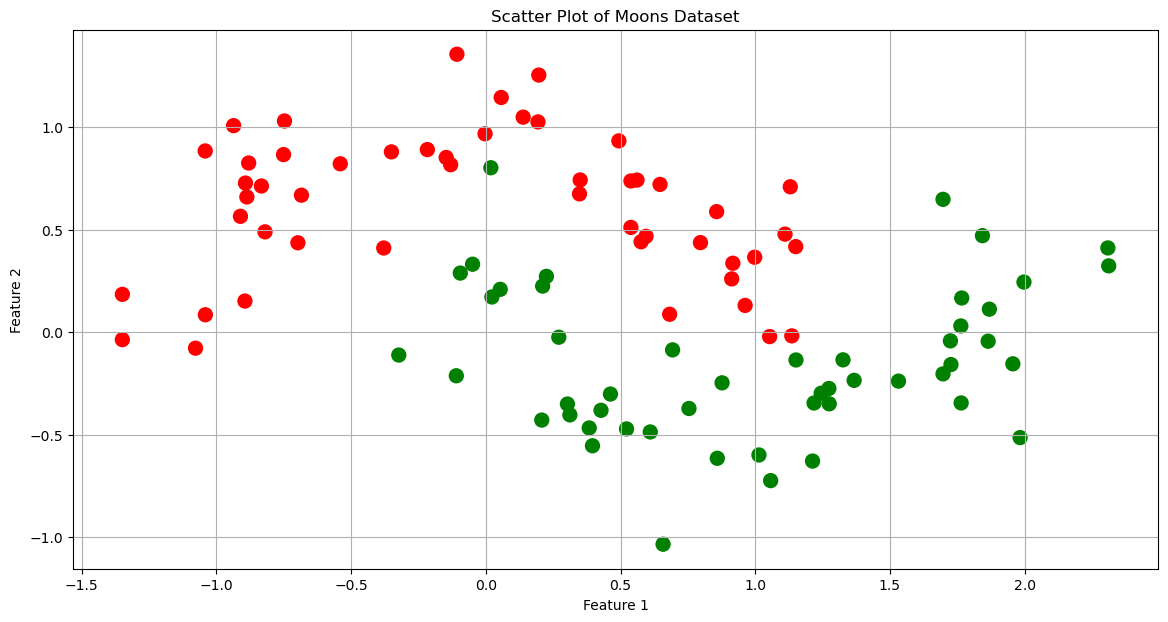

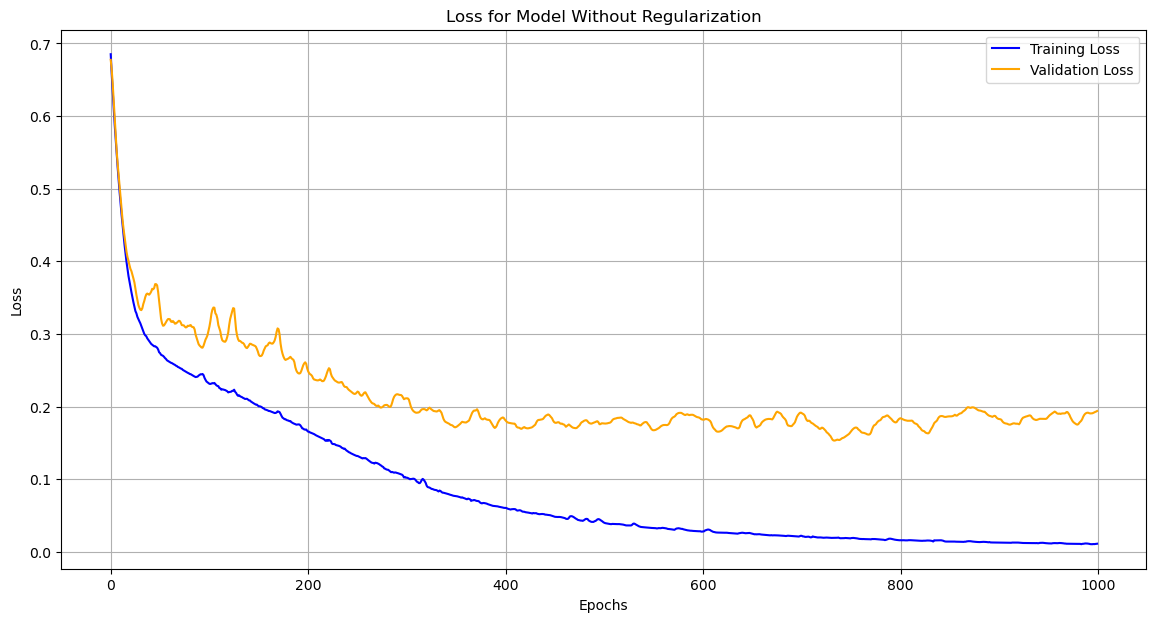

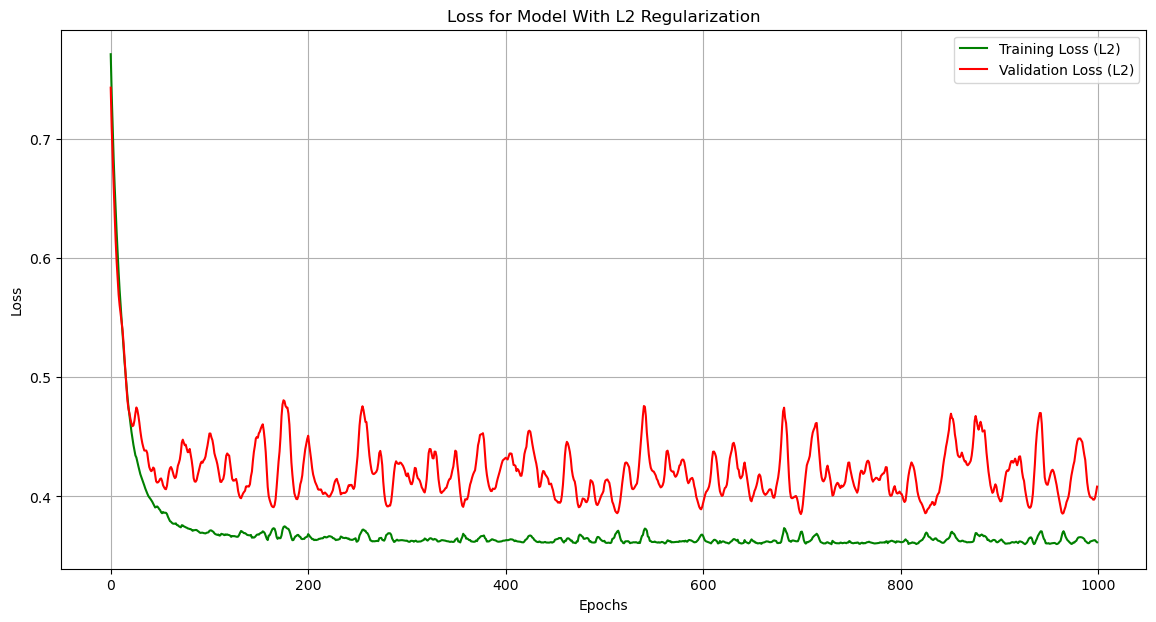

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# Set random seed for reproducibility
np.random.seed(800)

# Generating synthetic data
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
zero_one_colourmap = ListedColormap(('red', 'green'))
rcParams['figure.figsize'] = 14, 7

# Scatter plot of the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=zero_one_colourmap)
plt.title("Scatter Plot of Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()  # Display scatter plot

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model without regularization
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

# Plotting loss for the model without regularization
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("Loss for Model Without Regularization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()  # Display loss plot

# Model with L2 regularization
reg_model = Sequential()
reg_model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
reg_model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
reg_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model with L2 regularization
reg_history = reg_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

# Plotting loss for the model with L2 regularization
plt.plot(reg_history.history['loss'], label='Training Loss (L2)', color='green')
plt.plot(reg_history.history['val_loss'], label='Validation Loss (L2)', color='red')
plt.title("Loss for Model With L2 Regularization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()  # Display loss plot


L1 & L2 Regularization using Moons Dataset

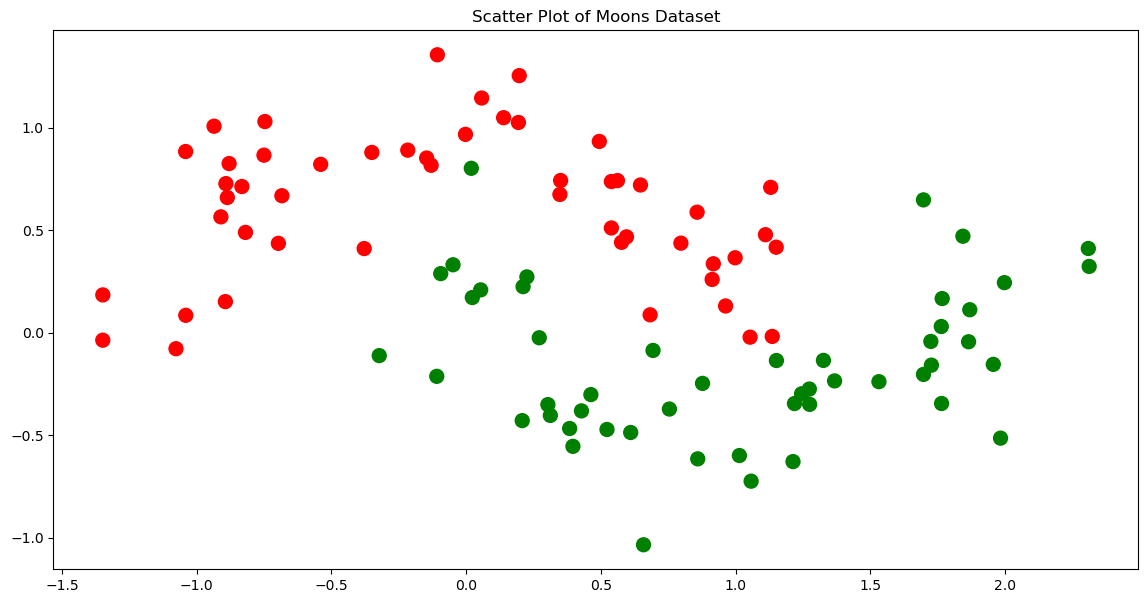

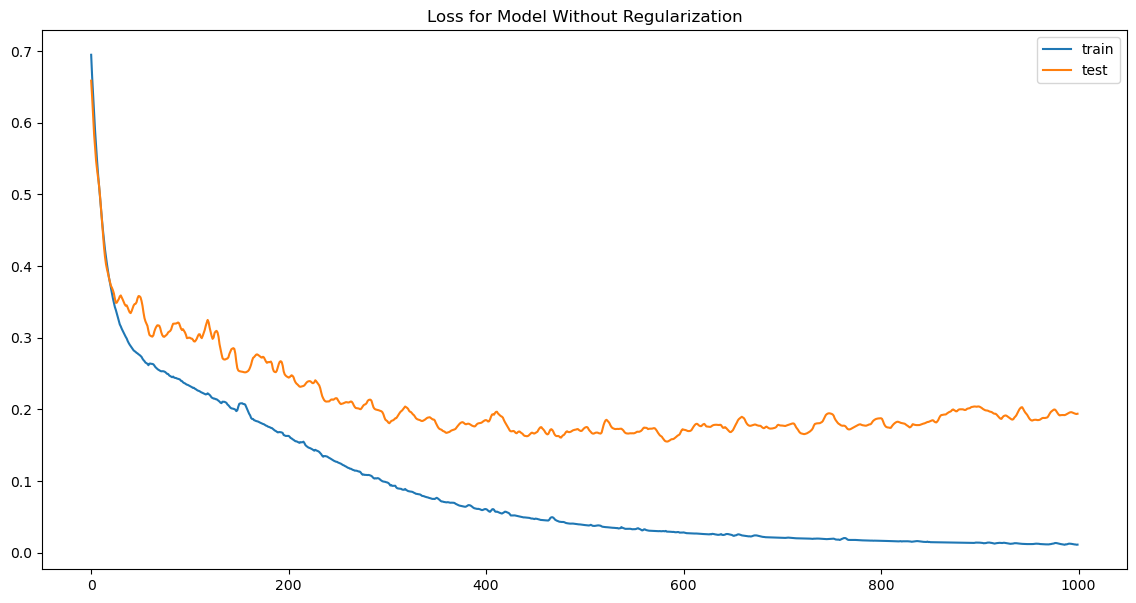

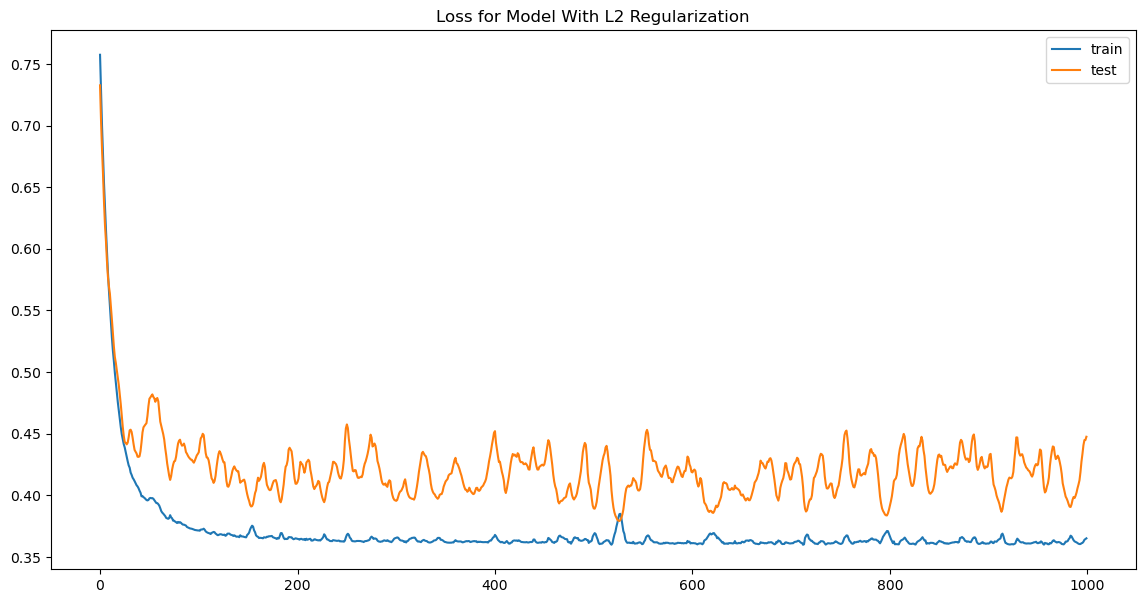

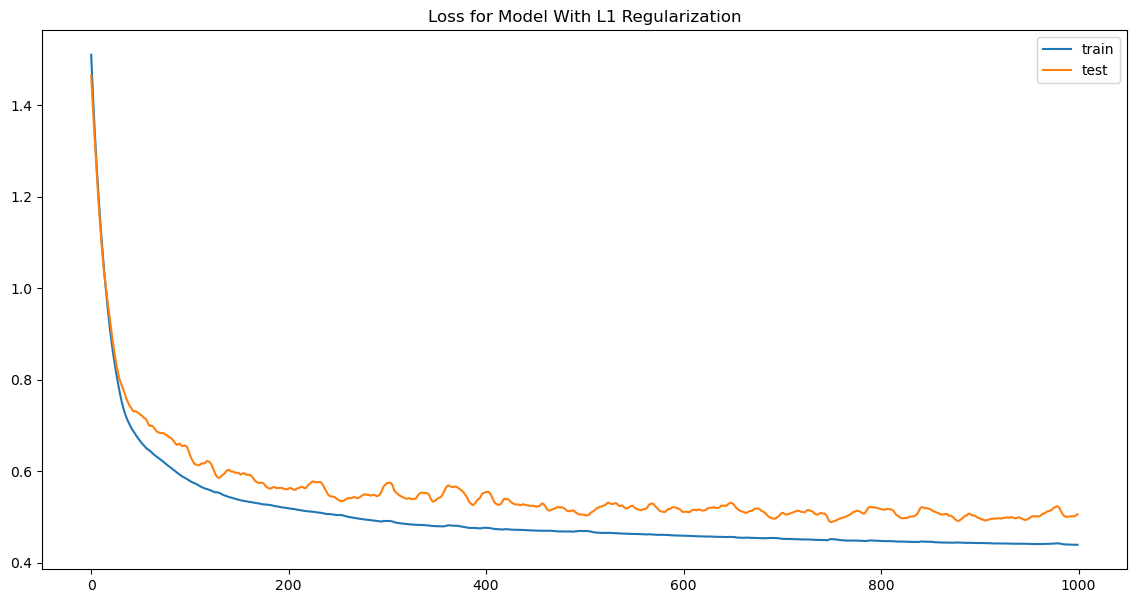

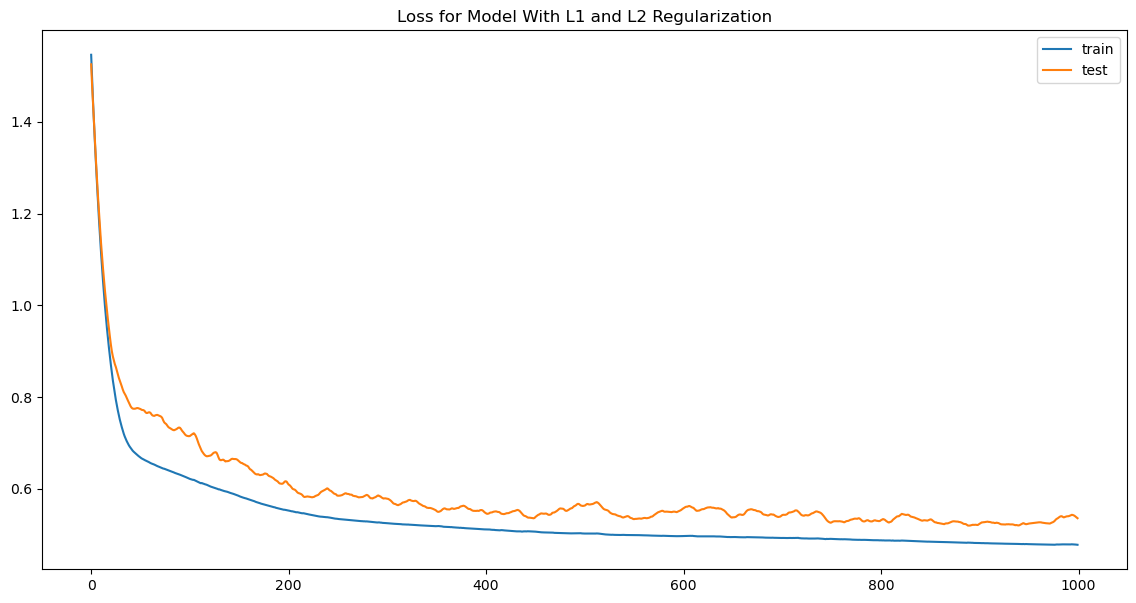

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

np.random.seed(800)

# Generating synthetic data
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
zero_one_colourmap = ListedColormap(('red', 'green'))
rcParams['figure.figsize'] = 14, 7
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=zero_one_colourmap)
plt.title("Scatter Plot of Moons Dataset")
plt.show()  # Display scatter plot

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model without regularization
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

# Plotting loss for the model without regularization
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Loss for Model Without Regularization")
plt.legend()
plt.show()  # Display loss plot

# Model with L2 regularization
l2_model = Sequential()
l2_model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
l2_model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
l2_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

l2_history = l2_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

# Plotting loss for the model with L2 regularization
plt.plot(l2_history.history['loss'], label='train')
plt.plot(l2_history.history['val_loss'], label='test')
plt.title("Loss for Model With L2 Regularization")
plt.legend()
plt.show()  # Display loss plot

# Model with L1 regularization
l1_model = Sequential()
l1_model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
l1_model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1(0.01)))
l1_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

l1_history = l1_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

# Plotting loss for the model with L1 regularization
plt.plot(l1_history.history['loss'], label='train')
plt.plot(l1_history.history['val_loss'], label='test')
plt.title("Loss for Model With L1 Regularization")
plt.legend()
plt.show()  # Display loss plot

# Model with L1_L2 regularization
l1_l2_model = Sequential()
l1_l2_model.add(Dense(500, input_dim=2, activation='relu',
                      kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
l1_l2_model.add(Dense(1, activation='sigmoid',
                      kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
l1_l2_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

l1_l2_history = l1_l2_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

# Plotting loss for the model with L1_L2 regularization
plt.plot(l1_l2_history.history['loss'], label='train')
plt.plot(l1_l2_history.history['val_loss'], label='test')
plt.title("Loss for Model With L1 and L2 Regularization")
plt.legend()
plt.show()  # Display loss plot
